## Exploratory Data Analysis

#### The code below is used to perform exploratory data analysis on the dataset after preprocessing. It reads the filtered CSV file and displays basic information about the dataset, including the number of samples, class distribution, and sample images from each class.

Columns: Index(['id', 'class_name', 'file_path', 'resolution'], dtype='object')


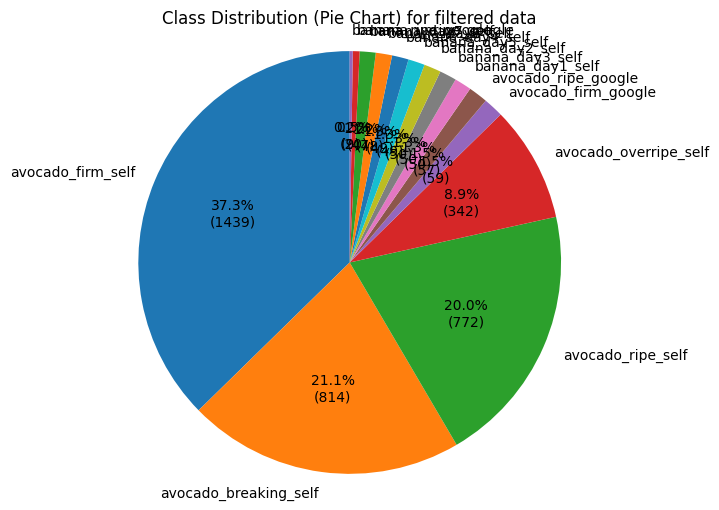

Columns in unfiltered data: Index(['id', 'class_name', 'file_path', 'resolution'], dtype='object')


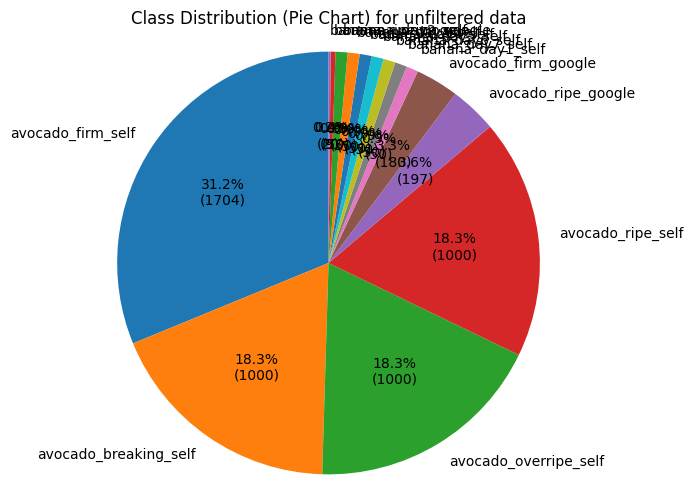

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

step1_path = "";

with open("./step1.txt", "r") as f:
    step1_path = f.read().strip()

# Read the filtered CSV
all_df = pd.read_csv(step1_path)
print("Columns:", all_df.columns)

# Replace 'class' with the actual column name if different
class_col = 'class_name' if 'class_name' in all_df.columns else all_df.columns[-1]

# Count occurrences of each class
class_counts = all_df[class_col].value_counts()

# Pie chart of class distribution with numbers shown
def make_autopct(values):
    def my_autopct(pct):
        total = int(values.sum())
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

plt.figure(figsize=(6, 6))
class_counts.plot(
    kind='pie',
    autopct=make_autopct(class_counts),
    startangle=90,
    legend=False
)
plt.title('Class Distribution (Pie Chart) for filtered data')
plt.ylabel('')
plt.axis('equal')  # keep pie circular
plt.show()

unfiltered_df = pd.read_csv("./sub/paralells/result.csv")
# Assuming the class label is in a column named 'class' or similar
# If not, print columns to inspect
print("Columns in unfiltered data:", unfiltered_df.columns)
class_col_unfiltered = 'class_name' if 'class_name' in unfiltered_df.columns else unfiltered_df.columns[-1]
class_counts_unfiltered = unfiltered_df[class_col_unfiltered].value_counts()
plt.figure(figsize=(6, 6))
class_counts_unfiltered.plot(
    kind='pie',
    autopct=make_autopct(class_counts_unfiltered),
    startangle=90,
    legend=False
)
plt.title('Class Distribution (Pie Chart) for unfiltered data')
plt.ylabel('')
plt.axis('equal')  # keep pie circular
plt.show()



#### The dataset seems to be distributed primarily to avocados more compared to other fruits. For the next processing steps and through modelling, we may consider separating models per fruit type to get better results, and also augmenting the dataset for underrepresented classes like banans.

## Visualize Dataset

#### This code will visualize 3 samples from each class in the dataset to give an overview of the data distribution and variety.

Sample images from filtered data:


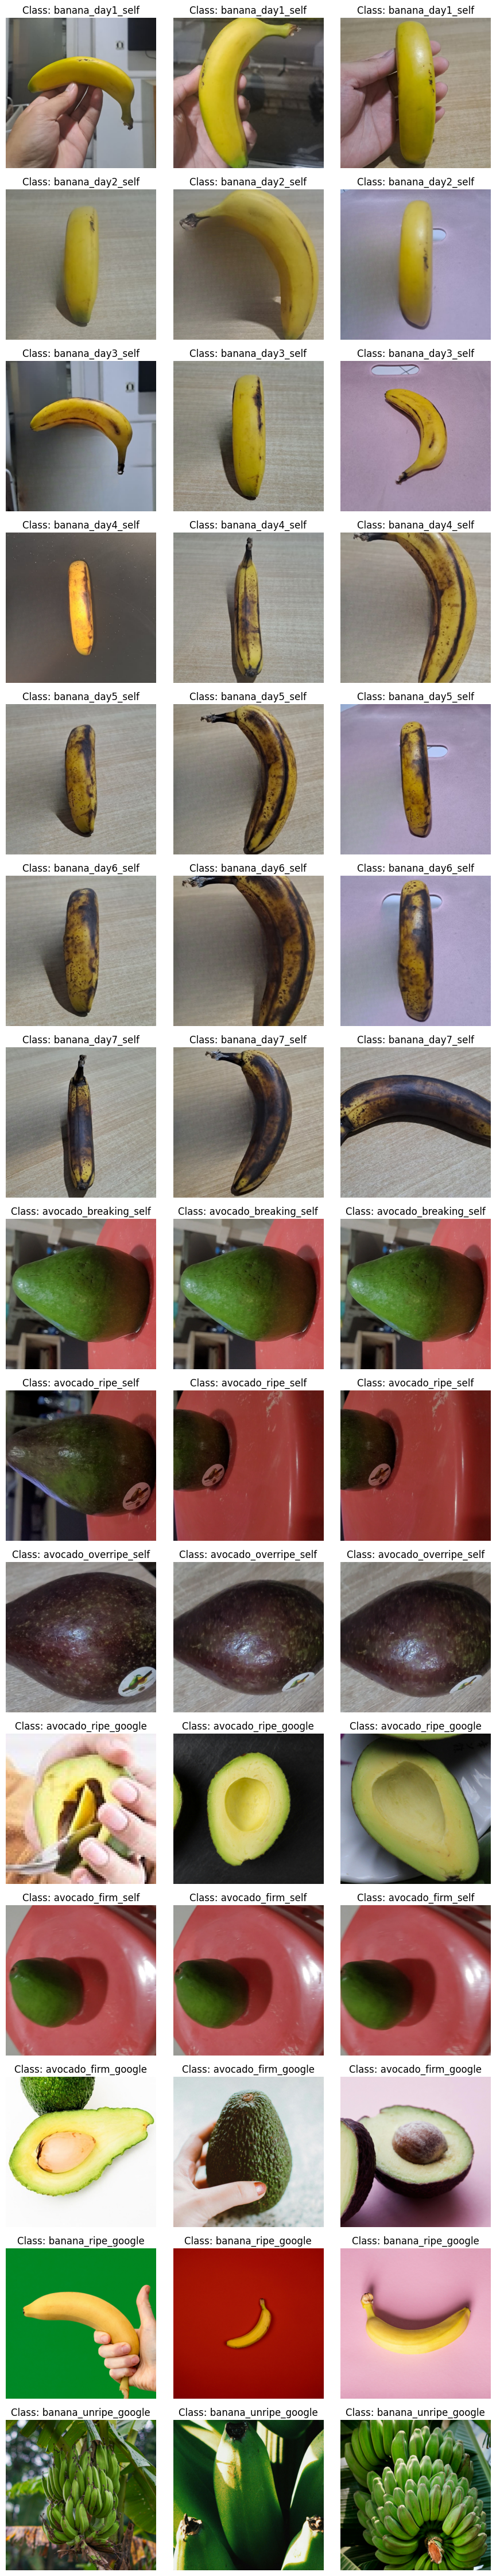

In [2]:
import cv2
# Visualize sample images from each class
def plot_sample_images_per_class(df, class_col, samples_per_class=3):
    unique_classes = df[class_col].unique()
    num_classes = len(unique_classes)
    fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(samples_per_class * 3, num_classes * 3))
    
    for i, cls in enumerate(unique_classes):
        class_images = df[df[class_col] == cls]['file_path'].tolist()
        sampled_images = class_images[:samples_per_class]
        
        for j in range(samples_per_class):
            ax = axes[i, j] if num_classes > 1 else axes[j]
            if j < len(sampled_images):
                img_path = sampled_images[j]
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                ax.imshow(img)
                ax.set_title(f'Class: {cls}')
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot samples from filtered data
print("Sample images from filtered data:")
plot_sample_images_per_class(all_df, class_col)

#### The "self" collected images seem to be more stable in the environments and lighting compared to the "google" collected images. This may affect the model's performance, so further augmentation or normalization may be needed to balance the dataset.

#### The "google" collected images seem to have more variety in terms of backgrounds and lighting conditions, which could help improve the model's robustness if properly balanced with the "self" collected images. 

# Check Image Resolution

#### To determine the image sizes for all of the the images in the dataset to ensure consistency before feeding them into the model. This code will read each image, get its dimensions, and visualize the data

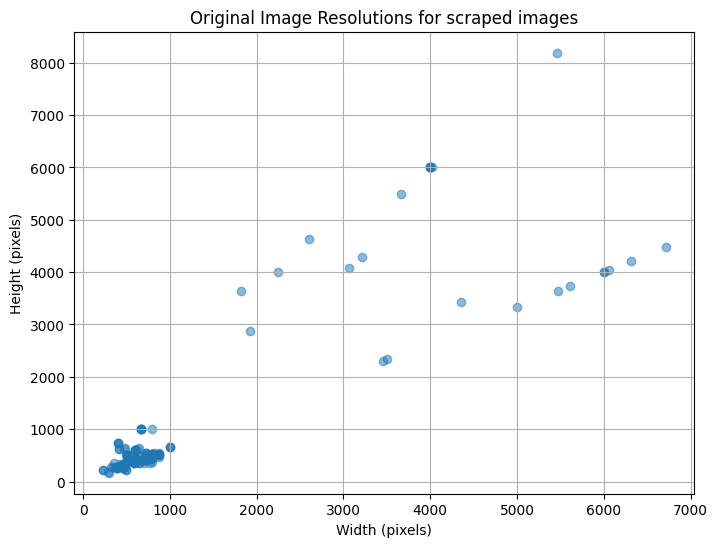

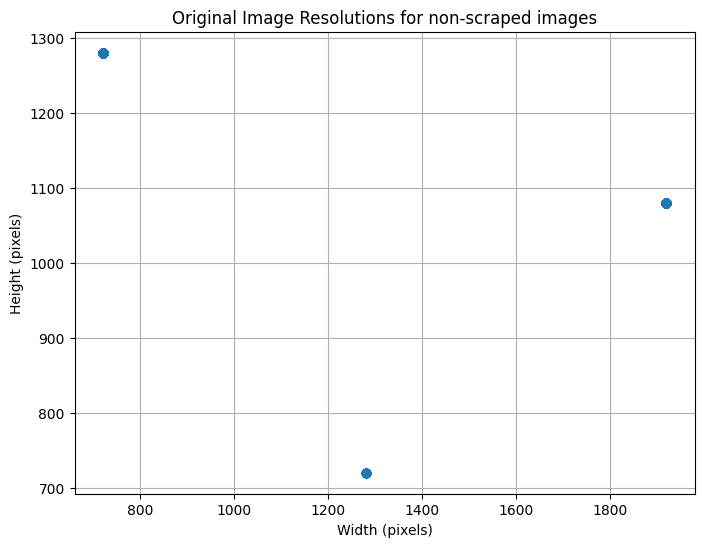

In [3]:
# Display the image sizes before and after processing
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
# Read the filtered CSV as the resolution doesnt change after processing, and find classes where the 2nd column contains "google"
step1_path = "";

with open("./step1.txt", "r") as f:
    step1_path = f.read().strip()

filtered_df2 = pd.read_csv(step1_path)
filtered_df2 = filtered_df2[filtered_df2.iloc[:, 1].str.contains("google", case=False, na=False)]
# Extract original resolutions from the 4th column
resolutions = filtered_df2.iloc[:, 3].dropna().tolist()
widths, heights = zip(*(map(int, res.split('x')) for res in resolutions if 'x' in res))
# Plot original resolutions as scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Original Image Resolutions for scraped images')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()

# Read the filtered CSV as the resolution doesnt change after processing, and find classes where the 2nd column does not contain "google"
filtered_df2 = pd.read_csv(step1_path)
filtered_df2 = filtered_df2[~filtered_df2.iloc[:, 1].str.contains("google", case=False, na=False)]
# Extract original resolutions from the 4th column
resolutions = filtered_df2.iloc[:, 3].dropna().tolist()
widths, heights = zip(*(map(int, res.split('x')) for res in resolutions if 'x' in res))
# Plot original resolutions as scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Original Image Resolutions for non-scraped images')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()


# Brightness and Bluriness

#### Analyzing brightness and blurriness of images in the dataset to assess image quality. This code calculates brightness using the mean pixel intensity and blurriness using the variance of the Laplacian method. The results are visualized using histograms to understand the distribution of brightness and blurriness across the dataset.

                       count  lap_var_mean  lap_var_std  brightness_mean  \
class_name                                                                 
avocado_firm_self       1439     53.436656    57.596460        92.189062   
avocado_breaking_self    814     58.875583    53.195458        91.375358   
avocado_ripe_self        772     60.647907    48.496333        85.417985   
avocado_overripe_self    342     49.646200    31.296418        69.487479   
banana_day1_self          50     27.177274    22.627529       128.628719   
banana_day2_self          50     10.966522     8.660894       130.024665   
banana_day3_self          50     30.947073    21.944497       126.217923   
banana_day4_self          49     24.322796    12.095784       128.665165   
banana_day5_self          49     38.200849    17.879317       123.538376   
banana_day6_self          48     34.765692    19.683124       124.156805   
banana_day7_self          47     40.438228    23.731706       120.410351   

           

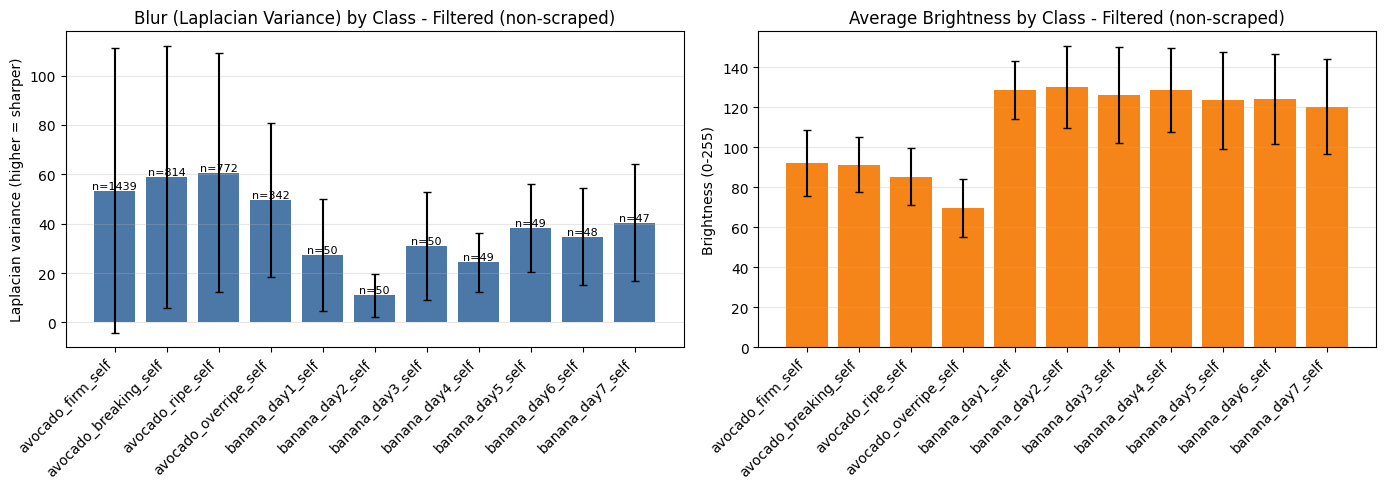

Processed 3710 images across 11 classes using 12 workers.
                      count  lap_var_mean  lap_var_std  brightness_mean  \
class_name                                                                
avocado_firm_google      59    142.321079   125.807309       146.716206   
avocado_ripe_google      57    131.929242   122.678279       144.808404   
banana_unripe_google     20    295.523772   169.384988       111.399336   
banana_ripe_google        9     54.832441    95.536456       124.842428   

                      brightness_std  
class_name                            
avocado_firm_google        41.207911  
avocado_ripe_google        46.707148  
banana_unripe_google       28.905409  
banana_ripe_google         48.808075  


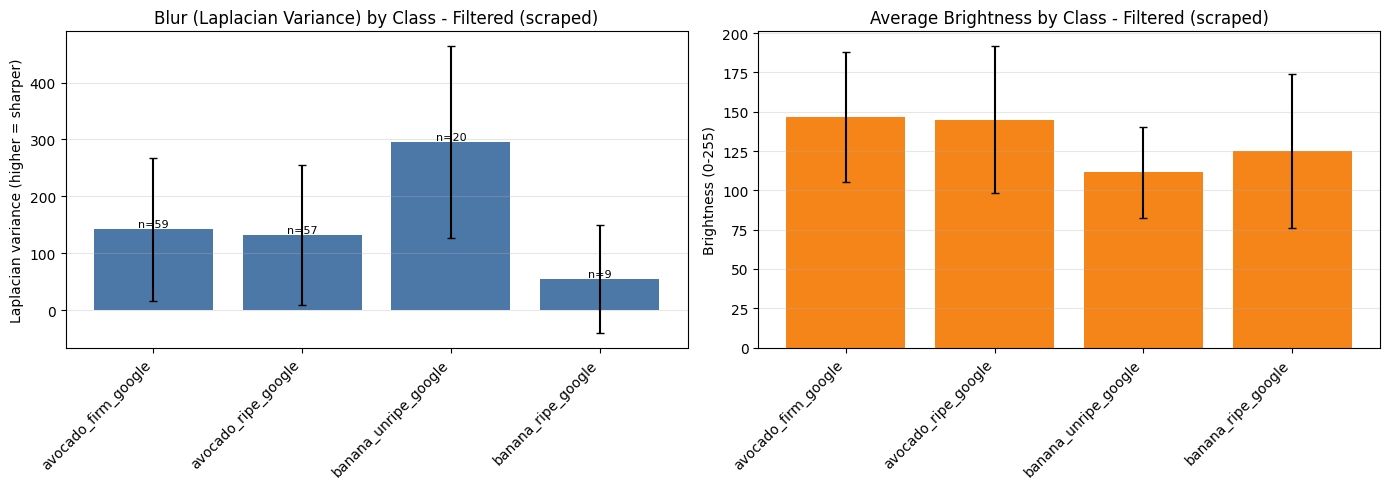

Processed 145 images across 4 classes using 12 workers.


In [4]:
from concurrent.futures import ThreadPoolExecutor
from typing import Tuple, Optional
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_image_quality_by_class(
    df,
    class_column: Optional[str] = None,
    path_column: str = "file_path",
    max_workers: Optional[int] = None,
    dataset_name: str = "Dataset",
) -> Tuple[Optional[pd.DataFrame], Optional[pd.DataFrame]]:
    """
    Compute Laplacian variance (focus/blur measure) and average brightness for each image,
    aggregate per class, and draw summary plots. Runs image processing in parallel.

    Returns:
      - per_image_df: DataFrame with columns [class_column, laplacian_variance, avg_brightness]
      - summary_df: Aggregated stats per class with mean/std and counts
    """
    if class_column is None:
        # Use existing global `class_col` variable
        class_column = class_col

    # Collect valid (path, class) pairs
    pairs = []
    for _, row in df.iterrows():
        p = row[path_column]
        c = row[class_column]
        if isinstance(p, str) and os.path.isfile(p):
            pairs.append((p, c))

    if not pairs:
        print("No valid image paths found.")
        return None, None

    def _worker(args):
        path, cls = args
        try:
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            if img is None:
                return None
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            lap_var = float(cv2.Laplacian(gray, cv2.CV_64F).var())
            brightness = float(gray.mean())
            return (cls, lap_var, brightness)
        except Exception:
            return None

    max_workers = max_workers or min(32, (os.cpu_count() or 4))
    results = []
    with ThreadPoolExecutor(max_workers=max_workers) as ex:
        for r in ex.map(_worker, pairs):
            if r is not None:
                results.append(r)

    if not results:
        print("No images processed successfully.")
        return None, None

    per_image_df = pd.DataFrame(results, columns=[class_column, "laplacian_variance", "avg_brightness"])

    summary = (
        per_image_df.groupby(class_column)
        .agg(
            count=("laplacian_variance", "count"),
            lap_var_mean=("laplacian_variance", "mean"),
            lap_var_std=("laplacian_variance", "std"),
            brightness_mean=("avg_brightness", "mean"),
            brightness_std=("avg_brightness", "std"),
        )
        .sort_values("count", ascending=False)
    )
    print(summary)
    # Plot: blur metric and brightness with error bars
    classes = summary.index.tolist()

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)

    axes[0].bar(classes, summary["lap_var_mean"], yerr=summary["lap_var_std"], capsize=3, color="#4C78A8")
    axes[0].set_title(f"Blur (Laplacian Variance) by Class - {dataset_name}")
    axes[0].set_ylabel("Laplacian variance (higher = sharper)")
    axes[0].grid(axis="y", alpha=0.3)
    for tick in axes[0].get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment("right")
    # Annotate counts on top
    for i, (cls, row) in enumerate(summary.iterrows()):
        axes[0].text(i, row["lap_var_mean"], f"n={int(row['count'])}", ha="center", va="bottom", fontsize=8)

    axes[1].bar(classes, summary["brightness_mean"], yerr=summary["brightness_std"], capsize=3, color="#F58518")
    axes[1].set_title(f"Average Brightness by Class - {dataset_name}")
    axes[1].set_ylabel("Brightness (0-255)")
    axes[1].grid(axis="y", alpha=0.3)
    for tick in axes[1].get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment("right")

    plt.tight_layout()
    plt.show()

    print(f"Processed {len(per_image_df)} images across {summary.shape[0]} classes using {max_workers} workers.")
    return per_image_df, summary

filtered_df2 = pd.read_csv(step1_path)
filtered_df2 = filtered_df2[~filtered_df2.iloc[:, 1].str.contains("google", case=False, na=False)]

# Example usage on filtered and unfiltered datasets:
per_image_df_filtered, summary_filtered = compute_image_quality_by_class(
    filtered_df2, class_column=class_col, path_column="file_path", dataset_name="Filtered (non-scraped)"
)

filtered_df2 = pd.read_csv(step1_path)
filtered_df2 = filtered_df2[filtered_df2.iloc[:, 1].str.contains("google", case=False, na=False)]

# Example usage on filtered and unfiltered datasets:
per_image_df_filtered, summary_filtered = compute_image_quality_by_class(
    filtered_df2, class_column=class_col, path_column="file_path", dataset_name="Filtered (scraped)"
)

#### The average brightness and average blur seem to indicate that the images are in an acceptable range. The next preprocessing steps will include normalization and augmentation to further enhance image quality and variety for model training.